In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
from tqdm.notebook import tqdm, trange
from scipy.stats import norm
import matplotlib.pyplot as plt
from src.models import IsotropicGaussian
from src.core import check_intersections

import warnings
warnings.filterwarnings('ignore')

In [5]:
!ls data/*.csv

data/60b7a867e27703d1e26b503c_MindSweeper2AFC_2024-09-27_12h27.03.167.csv
data/62e6e32ae800ebf66dd612bb_MindSweeper2AFC_2024-09-26_15h40.22.856.csv
data/633129042bb1ab9f1847e81f_MindSweeper2AFC_2024-09-27_09h35.04.491.csv
data/6567f7927d545288274fa46b_MindSweeper2AFC_2024-09-27_11h24.11.153.csv
data/65981b2c1df3be0020afa351_MindSweeper2AFC_2024-09-26_14h37.26.723.csv
data/65ac74387526e11440857740_MindSweeper2AFC_2024-09-26_14h40.36.029.csv
data/66048c64ef31e01a6369fdc7_MindSweeper2AFC_2024-09-27_12h40.24.989.csv
data/663791cf2001b8771b876561_MindSweeper2AFC_2024-09-26_15h44.15.111.csv
data/663eb5f6c16577126961c8bf_MindSweeper2AFC_2024-09-26_12h40.06.098.csv
data/664757043cb597943f321d65_MindSweeper2AFC_2024-09-27_12h25.09.244.csv
data/6651d1dbb86c52bd8858c3ef_MindSweeper2AFC_2024-09-27_12h25.52.944.csv
data/667434ac57d06c90c3261d5c_MindSweeper2AFC_2024-09-27_11h32.21.709.csv
data/6678426a9e81680de1d36737_MindSweeper2AFC_2024-09-26_14h49.27.360.csv
data/66a3c926ddeb69421de0c802_MindSwee

In [7]:
online_data_paths = [
    '../../data/2afc-pilot/data/63026a8fd8429b224cd2a134_MindSweeper2AFC_2024-08-15_21h03.35.273.csv',
    '../../data/2afc-pilot/data/65845dda978052080941c93a_MindSweeper2AFC_2024-08-15_17h54.17.152.csv',
    '../../data/2afc-pilot/data/6632d6381120b6cbed905bad_MindSweeper2AFC_2024-08-15_13h54.33.200.csv'
]

online_dfs = []
for i,path in enumerate(online_data_paths):
    # read in data data
    #data = pd.read_csv('../../data/H_imagery_2024-08-01_14h30.54.266.csv')
    data = pd.read_csv(path)
    data = data.loc[pd.notnull(data.target_file)]
    #print(len(data))

    correct = data.correct_resp
    resp = data['key_resp.keys'].values 
    if i == 2:
        new_resp = ['right' if r=='left' else 'left' for r in resp]
        data['key_resp.keys'] = new_resp
        resp = new_resp

    # mark the responses that were correct
    data['acc'] = np.array((resp==correct), dtype=int)
    online_dfs.append(data)
    
    
local_data_paths = [
    './data/60b7a867e27703d1e26b503c_MindSweeper2AFC_2024-09-27_12h27.03.167.csv',
    './data/62e6e32ae800ebf66dd612bb_MindSweeper2AFC_2024-09-26_15h40.22.856.csv',
    './data/633129042bb1ab9f1847e81f_MindSweeper2AFC_2024-09-27_09h35.04.491.csv',
    './data/6567f7927d545288274fa46b_MindSweeper2AFC_2024-09-27_11h24.11.153.csv',
    './data/65981b2c1df3be0020afa351_MindSweeper2AFC_2024-09-26_14h37.26.723.csv',
    './data/65ac74387526e11440857740_MindSweeper2AFC_2024-09-26_14h40.36.029.csv',
    './data/66048c64ef31e01a6369fdc7_MindSweeper2AFC_2024-09-27_12h40.24.989.csv',
    './data/663791cf2001b8771b876561_MindSweeper2AFC_2024-09-26_15h44.15.111.csv',
    './data/663eb5f6c16577126961c8bf_MindSweeper2AFC_2024-09-26_12h40.06.098.csv',
    './data/664757043cb597943f321d65_MindSweeper2AFC_2024-09-27_12h25.09.244.csv',
    './data/6651d1dbb86c52bd8858c3ef_MindSweeper2AFC_2024-09-27_12h25.52.944.csv',
    './data/667434ac57d06c90c3261d5c_MindSweeper2AFC_2024-09-27_11h32.21.709.csv',
    './data/6678426a9e81680de1d36737_MindSweeper2AFC_2024-09-26_14h49.27.360.csv',
    './data/66a3c926ddeb69421de0c802_MindSweeper2AFC_2024-09-27_12h26.16.025.csv',
    './data/66ad04de37b3697dc3418887_MindSweeper2AFC_2024-09-27_11h21.12.952.csv',
    './data/66b64f89a23aa4c424ae7fc2_MindSweeper2AFC_2024-09-27_09h32.11.903.csv',
    './data/66b790f2292e990f87756d7c_MindSweeper2AFC_2024-09-26_15h39.58.642.csv',
    './data/66dc8041ae4dec497fab08b7_MindSweeper2AFC_2024-09-26_15h43.40.411.csv',
    './data/66f234675062b0115bfd0864_MindSweeper2AFC_2024-09-26_15h38.10.529.csv',
    './data/66f54e60a479d76be2ee3b6a_MindSweeper2AFC_2024-09-26_15h39.19.635.csv',
    './data/66f5b2fb683413231a2075b2_MindSweeper2AFC_2024-09-26_15h37.33.032.csv',
    './data/66f5cadfe40f1d62e26ffdd0_MindSweeper2AFC_2024-09-27_11h25.12.443.csv',
    './data/66f6c4195f17d26ce8c8018d_MindSweeper2AFC_2024-09-27_12h24.44.415.csv',
    './data/TN-v2_MindSweeper2AFC_2024-09-26_11h11.53.017.csv'
]

dfs = []
for path in local_data_paths:
    # read in data data
    data = pd.read_csv(path)
    data = data.loc[pd.notnull(data.target_file)]
    correct = data.correct_resp
    resp = data['key_resp.keys'].values

    # mark the responses that were correct
    data['acc'] = np.array((resp==correct), dtype=int)
    if len(data) == 144 and data['acc'].mean() > .65:
        dfs.append(data)

In [8]:
len(dfs)

15

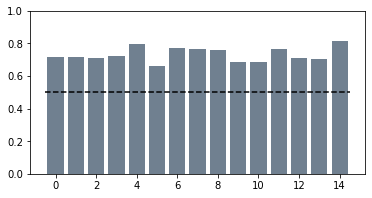

In [9]:
fig, ax = plt.subplots(figsize=(6, 3))

acc = [df.acc.mean() for df in dfs] 
ax.bar(np.arange(len(dfs)), acc, color=['slategrey' for _ in range(len(dfs))])
ax.plot([-.5, len(dfs) - .5], [.5, .5], linestyle='--', color='black')
ax.set_ylim(0, 1)

plt.show()

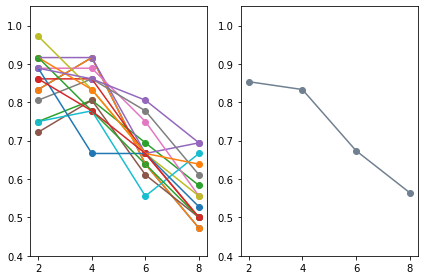

In [14]:
n_subjects = len(dfs)
tcs = list(set(dfs[0].target_complexity.values))

acc = np.ones((n_subjects, len(tcs)))

for i,df in enumerate(dfs):
    for j,tc in enumerate(tcs):
        d = df[df.target_complexity==tc]
        acc[i][j] = d.acc.mean()
        
fig, ax = plt.subplots(ncols=2, figsize=(6, 4))

for i in range(n_subjects):
    ax[0].scatter([2, 4, 6, 8], acc[i])
    ax[0].plot([2, 4, 6, 8], acc[i], label=i)

ax[1].scatter([2, 4, 6, 8], acc.mean(axis=0), c='slategrey')
ax[1].plot([2, 4, 6, 8], acc.mean(axis=0), c='slategrey')
for a in ax:
    a.set_ylim((.4, 1.05))
    
plt.tight_layout()
plt.show()

In [27]:
from src.probes import generate_custom_probe_set_ext

def load_curves(output_path, n_curves):
    curves_path = output_path + '/curves'
    knots_path = output_path + '/knots'
    curves = [np.loadtxt(curves_path + f'/curve_{i}.txt') for i in range(n_curves)]
    knots = [np.loadtxt(knots_path + f'/knots_{i}.txt') for i in range(n_curves)]
    #for k in knots:
    #    print(k.shape, len(k)//2)
    #knots = [np.reshape(k, (len(k) // 2, 2)) for k in knots]
    return curves, knots
    
def split_by_complexity(X, n_targets_per_complexity):
    return np.array([X[i:i+n_targets_per_complexity] for i in range(0, len(X), n_targets_per_complexity)])

def compute_SNR(X):
    S = X.mean(axis=2).var(axis=1)
    N = X.var(axis=2).mean(axis=1)
    SNR = S/N
    return SNR.mean()

def compute_d_prime(X, X_hat):
    X = X.flatten()
    X_hat = X_hat.flatten()
    
    n_signal = len(X[X==1])
    n_noise =  len(X[X==0])
    n_hits =  (X_hat[X==1]).sum()
    n_fa =    (X_hat[X==0]).sum()
    
    H = n_hits / n_signal
    F = n_fa / n_noise
    d_prime = norm.ppf(H) - norm.ppf(F)
    return d_prime

In [28]:
targets, knots = load_curves('./', 12)
probes = generate_custom_probe_set_ext(2, ext=.2, plot=False)

In [29]:
def run_simulation(targets, knots, probes, n_repeats, tau=7, capacity=2):
    n_targets, n_probes = len(targets), len(probes)
    X = np.ones((n_targets, n_probes, n_repeats)) *-1
    C = np.ones((n_targets, n_probes, n_repeats)) *-1
    R = np.ones((n_targets, n_probes, n_repeats)) *-1
    X_hat = np.ones((n_targets, n_probes, n_repeats)) *-1
    R_hat = np.ones((n_targets, n_probes, n_repeats)) *-1

    for i,(t,k) in enumerate(zip(targets, knots)):
        model = IsotropicGaussian(k, capacity, tau)
        sample = model.sample_curves(n_probes*n_repeats)
        for j,p in enumerate(probes):
            _,n = check_intersections(t, p)
            if n == 0:
                c = .5
            else:
                c = n+.5 if ((i+j)%2 == 0) else n-.5
            r = 1 if n > c else 0
            for k in range(n_repeats):
                X[i, j, k] = n
                C[i, j, k] = c
                R[i, j, k] = r
                _,n_hat = check_intersections(sample[(j*n_repeats) + k], p)
                X_hat[i, j, k] = n_hat
                R_hat[i, j, k] = 1 if n_hat > c else 0
    
    return X, X_hat, R, R_hat

def run_n_simulations(target_curves, knots, probes, n_sims, n_samples, nc, npc, capacity, tau):
    X = np.zeros((n_sims, 3, nc))
    for i in trange(n_sims):
        _,_,R_vis_sim, R_img_sim = run_simulation(target_curves, 
                                                  knots, 
                                                  probes, 
                                                  n_samples, 
                                                  capacity=capacity, 
                                                  tau=tau)
        A_sim = (R_img_sim == R_vis_sim).astype(int)
        E_sim = R_img_sim - R_vis_sim
        avg_error_sim = [e.mean() for e in split_by_complexity(E_sim, npc)]
        avg_acc_sim = [a.mean() for a in split_by_complexity(A_sim, npc)]
        avg_var_sim = [x.var(axis=2).mean() for x in split_by_complexity(R_img_sim, npc)]
        #avg_snr_sim = [compute_SNR(x) for x in split_by_complexity(R_img_sim, npc)]

        R_sim = list(zip(split_by_complexity(R_vis_sim, npc), split_by_complexity(R_img_sim, npc)))
        d_prime_sim = [compute_d_prime(r_vis, r_img) for (r_vis, r_img) in R_sim]

        for j in range(nc):
            #X[i][0][j] = avg_error_sim[j]
            X[i][0][j] = avg_acc_sim[j]
            X[i][1][j] = avg_var_sim[j]
            X[i][2
                ][j] = d_prime_sim[j]
            
    return X
    
    
def compute_Y(dfs, npc, nc):
    Y = np.zeros((len(dfs), 4, nc))

    for sid, data in enumerate(dfs):
        n_targets = len(list(set(data.target_id.values)))
        n_probes = len(list(set(data.probe_id.values)))
        n_repeats = len(data[(data.target_id==0) & (data.probe_id==0)])

        # compute the accuracy and error tensors
        R_img = np.ones((n_targets, n_probes, n_repeats)) * -1
        R_vis = np.ones((n_targets, n_probes, n_repeats)) * -1
        X_comp = np.ones((n_targets, n_probes, n_repeats)) * -1
        X_vis = np.ones((n_targets, n_probes, n_repeats)) * -1

        for tid in range(n_targets):
            for pid in range(n_probes):
                d = data[(data.target_id == tid) & (data.probe_id == pid)]
                resps = d['key_resp.keys'].values
                cor = d['correct_resp'].values
                try:
                    comp = d['comparator'].values
                except:
                    comp = d['comparison'].values 
                visn = d['n_isecs'].values
                for i, (r, c) in enumerate(zip(resps, cor)):
                    R_img[tid, pid, i] = 1 if r == 'right' else 0
                    R_vis[tid, pid, i] = 1 if c == 'right' else 0
                    X_comp[tid, pid, i] = comp[i]
                    X_vis[tid, pid, i] = visn[i]

        A = (R_img == R_vis).astype(int)
        E = R_img - R_vis

        avg_error = [e.mean() for e in split_by_complexity(E, npc)]
        avg_acc = [a.mean() for a in split_by_complexity(A, npc)]
        avg_var = [x.var(axis=2).mean() for x in split_by_complexity(R_img, npc)]
        avg_snr = [compute_SNR(x) for x in split_by_complexity(R_img, npc)]
        R = list(zip(split_by_complexity(R_vis, npc), split_by_complexity(R_img, npc)))
        d_prime = [compute_d_prime(r_vis, r_img) for (r_vis, r_img) in R]

        for j in range(len(avg_error)):
            #Y[sid, 0, j] = avg_error[j]
            Y[sid, 0, j] = avg_acc[j]
            Y[sid, 1, j] = avg_var[j]
            Y[sid, 2, j] = d_prime[j]
            
    return Y
    
    
def make_plots(X, Y, fig, ax):
    fs = 16
    #fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 6), sharex=True)
    x_range = np.arange(2, 13, 2)
    colors = ['slategrey', 'red']
    for x, color in zip([X, Y[:2,:,:]], colors):
        for i in range(len(x)):
            labels = ['accuracy', 'variance', 'd-prime']
            for j,label in enumerate(labels):
                if color == 'slategrey':
                    ax[j].plot(x_range, x[i][j], c='black', alpha=.05)
                if color=='slategrey':
                    #ax[r][c].plot(x_range, np.nanmean(x, axis=0)[0], c='black')
                    ax[j].plot(x_range, x.mean(axis=0)[j], c='black')
                else:
                    ax[j].plot(x_range, x[i][j], c=color, alpha=.1)
                    ax[j].plot(x_range, x.mean(axis=0)[j], c=color)


                ax[j].set_ylabel(label, fontsize=fs)

            for j, label in enumerate(labels):   
                xlower, xupper = [],[]
                ylower, yupper = [],[]

                for i in range(len(x_range)):
                    xlow, xhigh = st.t.interval(alpha=.99, df=n_sims-1, loc=x[:,j,i].mean(), scale=st.sem(x[:,j,i]))
                    xlower.append(xlow)
                    xupper.append(xhigh)
                if color == 'slategrey':
                    ax[j].fill_between(x_range, xlower, y2=xupper, color=color, alpha=.02)


            for i in range(len(ax)):
                    ax[i].set_xticks(x_range)
                    ax[i].spines['top'].set_visible(False)
                    ax[i].spines['right'].set_visible(False)
                    #ax[i][j].set_xlabel('complexity')


    ax[0].set_xlim(1.5, 12.5)
    ax[0].set_xticks(x_range)
    ax[2].set_xlabel('stimulus complexity', fontsize=fs)
    #ax[0].legend()
    #ax[-1].set_xlabel('complexity')
    fig.tight_layout()
    plt.subplots_adjust(wspace=.2, hspace=.2)
    plt.show()



  0%|          | 0/15 [00:00<?, ?it/s]

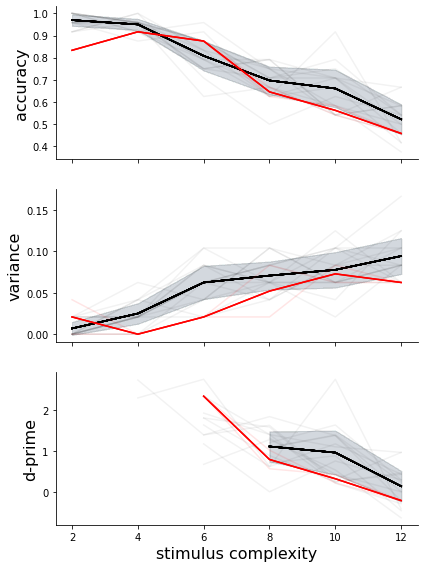

In [38]:
C,tau = 9, 7
nc,npc = 6, 2
n_sims,n_samples = 15, 2
X = run_n_simulations(targets, knots, probes, n_sims, n_samples, nc, npc, C, tau)
Y = compute_Y(dfs, npc, nc)

fig, ax = plt.subplots(nrows=3, figsize=(6,8), sharex=True)
make_plots(X,Y, fig, ax)
plt.show()

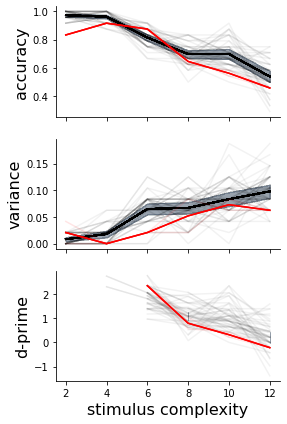

In [37]:
fig, ax = plt.subplots(nrows=3, figsize=(4,6), sharex=True)
make_plots(X,Y, fig, ax)
plt.show()